## Load Necessary Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
import tensorflow_datasets as tfds

## 1. Load the Beans Dataset

In [2]:
(bn_train, bn_validation, bn_test), bn_info = tfds.load(
    name = 'beans',
    split = ['train', 'validation', 'test'],
    as_supervised = True, 
    with_info = True
)

In [3]:
# Preprocess and Normalize the Dataset

def preprocess(image, label):
    image = tf.image.resize(image, (128, 128))
    image = tf.cast(image, tf.float32) / 255.0
    label = tf.cast(label, tf.int32)
    return image, label

batch_size = 32

#Preprocess and batch the data
bn_train = bn_train.map(preprocess).cache().shuffle(1000).batch(batch_size).prefetch(tf.data.AUTOTUNE)
bn_validation = bn_validation.map(preprocess).batch(batch_size).prefetch(tf.data.AUTOTUNE)
bn_test = bn_test.map(preprocess).batch(batch_size).prefetch(tf.data.AUTOTUNE)

## 3. Build the CNN Model

In [4]:
def simple_cnn_model():
    model = Sequential([
        Conv2D(32, (3,3), activation = 'relu', input_shape = (128, 128, 3)),
        MaxPooling2D((2,2)),
        Conv2D(64, (3,3), activation = 'relu'),
        MaxPooling2D((2,2)),
        Conv2D(64, (3,3), activation = 'relu'),
        MaxPooling2D((2,2)),
        Flatten(),
        Dense(128, activation = 'relu'),
        Dropout(0.5),
        Dense(3, activation = 'softmax')
    ])
    return model

In [5]:
cnn_model = simple_cnn_model()

In [6]:
# Compile the model 
cnn_model.compile(
    optimizer = 'adam', 
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy'])

# Train the model
history_cnn = cnn_model.fit(bn_train, validation_data = bn_validation, epochs = 10, verbose = 1)

# Evalaute the test data
test_lost_cnn_model, test_accuracy_cnn_model = cnn_model.evaluate(bn_test, verbose =1)
print(f"CNN Model Test Accuracy: {test_accuracy_cnn_model:.4f}")

Epoch 1/10
33/33 [==============================] - 10s 274ms/step - loss: 1.0367 - accuracy: 0.4468 - val_loss: 0.8499 - val_accuracy: 0.6842
Epoch 2/10
33/33 [==============================] - 9s 274ms/step - loss: 0.8239 - accuracy: 0.6402 - val_loss: 0.6614 - val_accuracy: 0.6767
Epoch 3/10
33/33 [==============================] - 9s 276ms/step - loss: 0.7274 - accuracy: 0.6770 - val_loss: 0.6473 - val_accuracy: 0.7068
Epoch 4/10
33/33 [==============================] - 9s 275ms/step - loss: 0.6671 - accuracy: 0.7176 - val_loss: 0.6274 - val_accuracy: 0.7444
Epoch 5/10
33/33 [==============================] - 9s 273ms/step - loss: 0.6061 - accuracy: 0.7524 - val_loss: 0.6256 - val_accuracy: 0.6992
Epoch 6/10
33/33 [==============================] - 9s 274ms/step - loss: 0.5888 - accuracy: 0.7611 - val_loss: 0.5838 - val_accuracy: 0.7594
Epoch 7/10
33/33 [==============================] - 9s 274ms/step - loss: 0.5497 - accuracy: 0.7698 - val_loss: 0.5869 - val_accuracy: 0.7744
Epoch

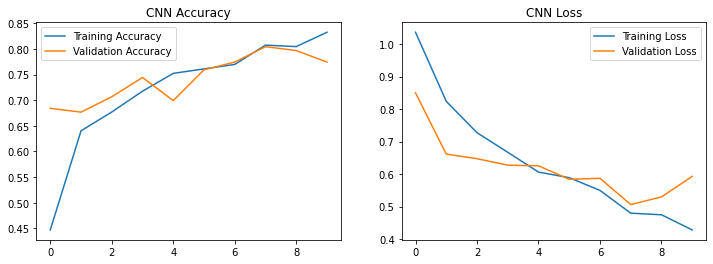

In [7]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_cnn.history['accuracy'], label='Training Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('CNN Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history_cnn.history['loss'], label='Training Loss')
plt.plot(history_cnn.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('CNN Loss')

plt.show()

In the above visualizations, we can see that there is some slight overfitting. The model trains well on the data, but we can see some drastic highs and lows as it attempts to action over the validation set. 

## 4. Apply Data Augmentation Techniques

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_aug = ImageDataGenerator(
    rotation_range = 20, 
    width_shift_range = 0.2, 
    height_shift_range = 0.2, 
    horizontal_flip = True, 
    zoom_range = 0.2
)

#Apply Augmentaiton steps to training data
aug_cnn = simple_cnn_model()
aug_cnn.compile(
    optimizer = 'adam', 
    loss = 'sparse_categorical_crossentropy', 
    metrics = ['accuracy']
)

In [9]:
# Train the model with Augmented Data

history_aug = aug_cnn.fit(bn_train, 
                          validation_data = bn_validation, 
                          epochs = 10, 
                          verbose = 1, 
                         )

Epoch 1/10
33/33 [==============================] - 10s 278ms/step - loss: 1.0902 - accuracy: 0.4091 - val_loss: 1.0276 - val_accuracy: 0.5038
Epoch 2/10
33/33 [==============================] - 9s 277ms/step - loss: 0.8630 - accuracy: 0.5909 - val_loss: 0.9327 - val_accuracy: 0.4662
Epoch 3/10
33/33 [==============================] - 9s 276ms/step - loss: 0.7912 - accuracy: 0.6412 - val_loss: 0.7700 - val_accuracy: 0.6992
Epoch 4/10
33/33 [==============================] - 9s 278ms/step - loss: 0.6637 - accuracy: 0.7118 - val_loss: 0.5815 - val_accuracy: 0.8045
Epoch 5/10
33/33 [==============================] - 9s 276ms/step - loss: 0.6024 - accuracy: 0.7524 - val_loss: 0.6089 - val_accuracy: 0.7744
Epoch 6/10
33/33 [==============================] - 9s 276ms/step - loss: 0.5403 - accuracy: 0.7805 - val_loss: 0.6144 - val_accuracy: 0.7143
Epoch 7/10
33/33 [==============================] - 9s 275ms/step - loss: 0.5407 - accuracy: 0.7805 - val_loss: 0.5733 - val_accuracy: 0.7970
Epoch

In [10]:
# Evaluate the Model

test_lost_aug, test_accuracy_aug = aug_cnn.evaluate(bn_test, verbose =1)
print(f"Augmented CNN Test Accuracy: {test_accuracy_aug:.4f}")

4/4 [==============================] - 0s 90ms/step - loss: 0.4792 - accuracy: 0.8047
Augmented CNN Test Accuracy: 0.8047


The data augmentation techniques improved the model's performance 8.6%.

## 5. Tranfer Learning

In [11]:
from tensorflow.keras.applications import MobileNetV2

# Load MobileNetV2 as the base model
base_model = MobileNetV2(input_shape=(128, 128, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze base model layers

# Build the transfer learning model
transfer_learning_model = Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # Output layer for 3 classes
])


In [12]:
# Compile the transfer learning model
transfer_learning_model.compile(optimizer='adam', 
                                loss='sparse_categorical_crossentropy', 
                                metrics=['accuracy'])

# Train the transfer learning model
history_transfer = transfer_learning_model.fit(bn_train, validation_data=bn_validation, epochs=10, verbose=1)

# Evaluate the transfer learning model
test_loss_transfer, test_accuracy_transfer = transfer_learning_model.evaluate(bn_test, verbose=1)
print(f"Transfer Learning Test Accuracy: {test_accuracy_transfer:.4f}")

Epoch 1/10
33/33 [==============================] - 11s 287ms/step - loss: 0.8340 - accuracy: 0.6567 - val_loss: 0.3702 - val_accuracy: 0.8647
Epoch 2/10
33/33 [==============================] - 9s 275ms/step - loss: 0.4347 - accuracy: 0.8250 - val_loss: 0.2887 - val_accuracy: 0.8947
Epoch 3/10
33/33 [==============================] - 9s 280ms/step - loss: 0.3117 - accuracy: 0.8810 - val_loss: 0.2701 - val_accuracy: 0.9023
Epoch 4/10
33/33 [==============================] - 9s 281ms/step - loss: 0.2643 - accuracy: 0.8956 - val_loss: 0.2614 - val_accuracy: 0.8797
Epoch 5/10
33/33 [==============================] - 9s 277ms/step - loss: 0.2124 - accuracy: 0.9217 - val_loss: 0.2109 - val_accuracy: 0.9248
Epoch 6/10
33/33 [==============================] - 9s 281ms/step - loss: 0.1899 - accuracy: 0.9304 - val_loss: 0.2712 - val_accuracy: 0.8872
Epoch 7/10
33/33 [==============================] - 9s 278ms/step - loss: 0.1703 - accuracy: 0.9313 - val_loss: 0.2115 - val_accuracy: 0.9323
Epoch

In [13]:
# Print the results
print(f"\nTransfer Learning Test Accuracy: {test_accuracy_transfer:.4f}")

# Print the model summary
print("\n**************************************************")
print("Transfer Learning Model Summary")
print("**************************************************")
transfer_learning_model.summary()


Transfer Learning Test Accuracy: 0.8984

**************************************************
Transfer Learning Model Summary
**************************************************
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_128 (Func  (None, 4, 4, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense_4 (Dense)             (None, 128)               163968    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (

The transfer learning model improved even more, increasing the model's performance by 9.37%